In [1]:
import pydot
import random
import math
import matplotlib.pyplot as plt
import networkx as nx
import math

## Assignment 1

### Parsing dot file

In [30]:
def parse_dot_file(file_path):
    graph = pydot.graph_from_dot_file(file_path)[0]  # Get the first graph from the list
    nodes = []
    edges = []
    for node in graph.get_nodes():
        nodes.append(node.get_name())
    for edge in graph.get_edges():
        source = edge.get_source()
        target = edge.get_destination()
        attributes = edge.get_attributes()
        edges.append((source, target, attributes))
    return nodes, edges

file_path = "D:/OneDrive - Universiteit Utrecht/Universiteit/3DataVisualisation/DataSet/LesMiserables.dot"
#LesMiserables, LeagueNetwork, polblogs
nodes, edges = parse_dot_file(file_path)

# print("Nodes:", nodes)
# print("Edges:")
# for edge in edges:
#     print(edge)


## Analyzing the edges

In [31]:
'''Edges+Nodes -> Adjacency matrix'''
num_nodes = len(nodes)
adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]

for i, edge in enumerate(edges):
    source = edge[0]
    target = edge[1]
    weight = edge[2]
    adj_matrix[nodes.index(source)][nodes.index(target)] = weight['weight']

print("Adjacency Matrix:")
print(nodes)
print(adj_matrix)

'''writing the nodes and the edges on a txt file'''
with open('adjacency_matrix.txt', 'w') as file:
    for item in adj_matrix:
            file.write(" ".join(map(str,item)))
            file.write("\n")

Adjacency Matrix:
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '44', '45', '49', '50', '52', '56', '59', '65', '69', '70', '71', '72', '73', '17', '18', '19', '20', '21', '22', '23', '31', '42', '43', '51', '40', '41', '76', '55', '46', '53', '58', '63', '47', '48', '60', '61', '62', '64', '66', '67', '74', '75', '77', '57', '54', '68']
[[0, '1', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, '8', '10', '1', '1', '1', '1', '2', '1', '5', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, '6', 0, 0, 0, 0, 0, 0, '3', 0,

In [32]:
'''Read adjacency matrix from the text file'''
def read_adjacency_matrix(file_path):
    # Read the text file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Process each line
    adjacency_matrix = []
    for line in lines:
        # Split the line by spaces, remove whitespace characters, convert to integers
        nums = [int(num) for num in line.strip().split()]
        # Append the list of integers to the result
        adjacency_matrix.append(nums)
    return adjacency_matrix

        
adjacency_matrix = read_adjacency_matrix("adjacency_matrix.txt")
print(adjacency_matrix)

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 10, 1, 1, 1, 1, 2, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
'''Adjacency Matrix (undirected) edge countings for each node'''
# vertical_list = [] #target based
# horizontal_list = [] #source based
# for index, x in enumerate(adjacency_matrix):
#     vertical_count = 0
#     for y in adj_matrix:
#         vertical_count += y[index]
#     vertical_list.append(vertical_count)
#     horizontal_list.append(x.count(1))
    
# print(vertical_list)
# print(horizontal_list)
# total_edge_countings = [vertical_list[i]+horizontal_list[i] for i in range(len(vertical_list))]
# print(total_edge_countings)

'Adjacency Matrix (undirected) edge countings for each node'

## Step 1: Basic MatplotLib Graph Drawing

The perfect structure (drawing conventions):
- Edges vertical/horizontal
- Symmetry
- Minimal graph size
- Maximal simple open curves
- Stress of layout (backpath not too long/too short)

The tree structure:
- Equal Distances between vertices
- Layered

goals (quality metrics):
- Minimum number of slopes
- Minimum number of corners bends
- Minimum intersections

In [34]:
# Function to arrange nodes in a square-like layout
def arrange_in_square(nodes):
    num_nodes = len(nodes)
    side_length = int(math.ceil(math.sqrt(num_nodes)))
    spacing = 50
    start_x, start_y = -((side_length - 1) * spacing) / 2, ((side_length - 1) * spacing) / 2
    node_positions = {}
    current_x, current_y = start_x, start_y
    for i, node in enumerate(nodes):
        node_positions[node] = (current_x, current_y)
        current_x += spacing

        if (i + 1) % side_length == 0:
            current_x = start_x
            current_y -= spacing  # Move to the next row
    return node_positions

def arrange_in_radial(nodes):
    num_nodes = len(nodes)
    radius = 200
    angle_step = 360 / num_nodes
    node_positions = {}
    for i, node in enumerate(nodes):
        angle = math.radians(i * angle_step)
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        node_positions[node] = (x, y)
    return node_positions

def arrange_in_semi_square(nodes):
    num_nodes = len(nodes)
    side_length = int(math.ceil(math.sqrt(num_nodes)))  # Calculate the side length of the square
    spacing = 60  # Spacing between nodes
    start_x, start_y = -((side_length - 1) * spacing) / 2, ((side_length - 1) * spacing) / 2
    node_positions = {}
    current_x, current_y = start_x, start_y
    for i, node in enumerate(nodes):
        node_positions[node] = (current_x, current_y + random.randint(-15, 15))
        current_x += spacing

        if (i + 1) % side_length == 0:
            current_x = start_x
            current_y -= spacing  # Move to the next row

    return node_positions

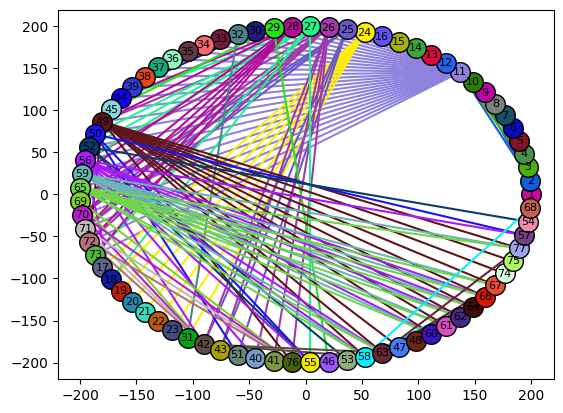

In [101]:
# Main function to draw the node-link diagram using Matplotlib
def draw_node_link_diagram(nodes, edges, structure='square', node_size=300, root=None, undirected=True, search_algorithm=None):
    fig, ax = plt.subplots()
    
    #add random color to each node (as node:colorvalue)
    node_colors = {}
    for node in nodes:
        node_colors[node] = "#" + ''.join(random.choices('0123456789ABCDEF', k=6)) #create random 6 hex code for color (which networkx uses)
    # Arrange nodes in a structure
    if structure =='square':
        node_positions = arrange_in_square(nodes)
    elif structure == 'radial':
        node_positions = arrange_in_radial(nodes)
    elif structure == 'semi_square':
        node_positions = arrange_in_semi_square(nodes)
    elif structure == 'tree':
        node_positions, edges = arrange_in_tree(nodes, edges, root, undirected)  
    # Draw nodes and labels
    for node, pos in node_positions.items():
        ax.scatter(pos[0], pos[1], s=node_size, color=node_colors[node], edgecolors='black', zorder=5)  # Draw node
        ax.text(pos[0], pos[1], node[0:4], ha='center', va='center', fontsize=8, zorder=10)  # Add label
    
    undrawn_nodes = [x for x in nodes if x not in node_positions.keys()]
    if not undirected and undrawn_nodes!=[]:
        print(None)
        #TODO add undrawn_nodes on the graph randomly outside 
        
    # Draw edges
    for edge in edges:
        source, target, _ = edge
        start = node_positions[source]
        end = node_positions[target]
        
        ax.plot([start[0], end[0]], [start[1], end[1]], color=node_colors[source], zorder=0)  # Draw edge

    if search_algorithm == "DFS":
        dfs_algorithm()
    elif search_algorithm == "BFS":
        bfs_algorithm()

    plt.show()

draw_node_link_diagram(nodes, edges, "radial", node_size=200)

## Step 1: Discussion

The Graph drawing shows a complexity of Linear time, meaning O(log n), because it shows no nested loops nor have logarithm time complexity in each operation. Because of the use of the Turtle library, more Nodes can easily be added and because of the complex libary, there are a lot of extra handy functions to improve the layout of the graph. But because the turtle manually writes to the screen, meaning it is a color written paper meaning each node nor edges are not interactive at all. 

As a bonus algorithm, both semi-squared and circle are implemented to show that the structure really matters how the layout is build. The semi-squared layout shows what happens when each node random moves from the vertical line and improves the layout, because you can now identify edges that are in the same vertical line. The circle layout

## Step 2: Tree based algorithm (DFS, BFS, Prim & Dijkstra)

### Tree structure
It is easier to use layered tree structure to visualize both DFS and BFS

In [74]:
def arrange_nodes_grid(node_positions, padding=10):
    num_columns = max(x for x, y in node_positions.values()) + 1
    column_width = max(y for x, y in node_positions.values()) + padding
    
    column_increment = 0
    row_count = 0
    for node, pos in sorted(node_positions.items()):
        # If the node is in a new column, increment column_increment and reset row_count
        if pos[0] == 0:
            column_increment += 1
            row_count = 0

        # Update the position of the node in the current column
        node_positions[node] = (column_width * column_increment, row_count * padding)

        # Increment row_count for the next node
        row_count += 1

    return node_positions

In [145]:
def arrange_in_tree(nodes, edges, root=None, undirected=True):
    num_nodes = len(nodes)
    node_positions = {}
    if root == None:
        root = nodes[0]
        
    node_positions[root] = (0, 0) 
    layer_space = 50
    node_space = 50
    padding = 10

    queue = [root]
    past_nodes = []
    '''Depth-first-search create tree algorithm'''
    while queue != []:
        current_node = queue[0]
        if undirected:
            connected_edges = [t[:2] for t in edges if current_node in t[:2]]
        else:
            connected_edges = [t[:2] for t in edges if current_node in t[:1]]     
        children_nodes = [value for tuple in connected_edges for value in tuple if value != current_node and value not in past_nodes]
        if children_nodes != []: 
            segment_length = node_space / len(children_nodes)
            parent_coords = node_positions[current_node]
            for i, children_node in enumerate(children_nodes):
                if children_node not in node_positions:
                    new_x = -node_space/2+segment_length*(0.5+i)
                    new_y = parent_coords[1]-layer_space
                    node_positions[children_node] = (new_x, new_y)
            queue = children_nodes + queue
            for children_node in children_nodes: #root node detected
                if node_positions[children_node][1] == node_positions[current_node][1]: #root node detected
                    edges = [item for item in edges if (item[0] != current_node or item[1] != children_node)]  
        queue.remove(current_node)
        past_nodes.append(current_node)
        
    '''Improve node positions in tree '''
    #this part will calculate what the max and min x&y-coordinate for the graph to determine the most rightest & leftest etc. place
    layer_min_max = {} 
    for node, node_pos in node_positions.items():
        layer = node_pos[1] #y-as
        x_coord = node_pos[0] #x-as
        if layer not in layer_min_max:
            layer_min_max[layer] = [x_coord, x_coord]
        else:
            if x_coord < layer_min_max[layer][0]:
                layer_min_max[layer][0] = x_coord
            if x_coord > layer_min_max[layer][1]:
                layer_min_max[layer][1] = x_coord

    # Move nodes which are already in the same layer and divide them equally through the layer
    for layer, (min_x, max_x) in layer_min_max.items():
        layer_nodes = [(node, pos) for node, pos in node_positions.items() if pos[1] == layer]
        if len(layer_nodes) > 1:
            interval = (max_x - min_x) / (len(layer_nodes) - 1)
            for i, (node, pos) in enumerate(layer_nodes):
                new_x = min_x + i * interval
                node_positions[node] = (new_x, pos[1])

#     print(node_positions)
    return node_positions, edges


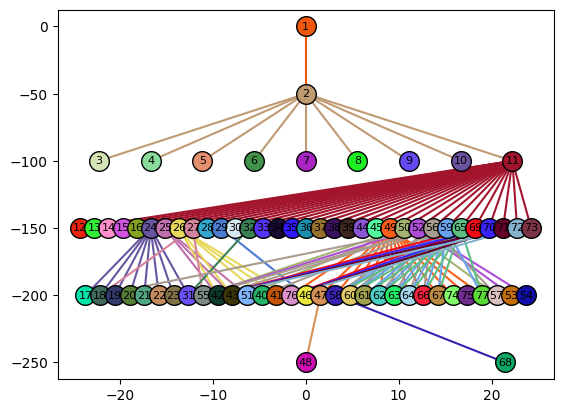

In [146]:
draw_node_link_diagram(nodes, edges, "tree", node_size=200, root='1', undirected=True)

### DFS

In [66]:
# DFS algorithm
def dfs(parents, nodes):
    node_positions = {}
    for node in nodes:
        node_positions[node] = (-1, -1)  # Initialize with invalid position

    def dfs(node, x, y, level):
        if node_positions[node] == (-1, -1):
            node_positions[node] = (x, y)
        else:
            # Node already visited, check if this visit is at a lower level
            if level < node_positions[node][1]:
                # If so, update the level
                node_positions[node] = (x, y)

        children = parents.get(node, [])
        if len(children) == 0:
            return
        if len(children) == 1:
            dfs(children[0], x+1, y-1, level+1)
        elif len(children) == 2:
            dfs(children[0], x, y-1, level+1)
            dfs(children[1], x+1, y-1, level+1)

    dfs(start, 0, 0, 0)

    return node_positions

TypeError: arrange_dfs_tree() missing 2 required positional arguments: 'nodes' and 'start'

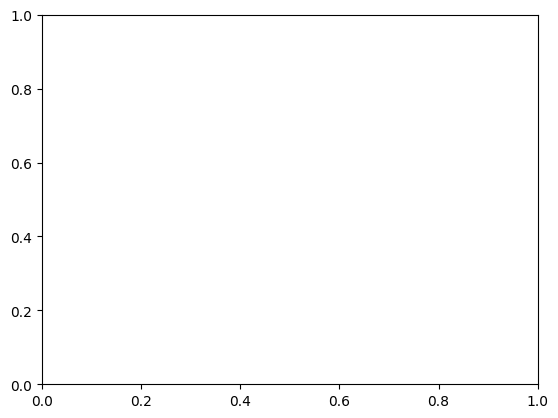

In [68]:
draw_node_link_diagram(nodes, edges, "tree", node_size=200, root='1', undirected=False, search_algorithm="DFS")

### BFS algorithm

In [64]:
def arrange_bfs_tree(parents, nodes, start):
    node_positions = {}
    for node in nodes:
        node_positions[node] = (-1, -1)  # Initialize with invalid position

    def bfs(node, x, y, level):
        if node_positions[node] == (-1, -1):
            node_positions[node] = (x, y)
        else:
            # Node already visited, check if this visit is at a lower level
            if level < node_positions[node][1]:
                # If so, update the level
                node_positions[node] = (x, y)

        children = parents.get(node, [])
        if len(children) == 0:
            return
        for i, child in enumerate(children):
            bfs(child, x+i, y-1, level+1)

    bfs(start, 0, 0, 0)

    return node_positions

### Prims Greedy Algorithm

In [22]:
'''Prim's Algorithm in Python (source: https://www.programiz.com/dsa/prim-algorithm)'''
INF = 9999999
'''number of vertices in graph'''
V = len(adjacency_matrix)
'''create a 2d array of size 5x5'''
'''for adjacency matrix to represent graph'''

# G = [[0, 9, 75, 0, 0],
#      [9, 0, 95, 19, 42],
#      [75, 95, 0, 51, 66],
#      [0, 19, 51, 0, 31],
#      [0, 42, 66, 31, 0]]
G = adjacency_matrix
'''create a array to track selected vertex'''
'''selected will become true otherwise false'''
selected = [0] * V
'''set number of edge to 0'''
no_edge = 0
'''the number of egde in minimum spanning tree will be'''
'''always less than(V - 1), where V is number of vertices in graph'''
'''choose 0th vertex and make it true'''
selected[0] = True
'''print for edge and weight'''
print("Edge : Weight\n")
while (no_edge < V - 1):
    # For every vertex in the set S, find the all adjacent vertices
    #, calculate the distance from the vertex selected at step 1.
    # if the vertex is already in the set S, discard it otherwise
    # choose another vertex nearest to selected vertex  at step 1.
    minimum = INF
    x = 0
    y = 0
    for i in range(V):
        if selected[i]:
            for j in range(V):
                if ((not selected[j]) and G[i][j]):  
                    # not in selected and there is an edge
                    if minimum > G[i][j]:
                        minimum = G[i][j]
                        x = i
                        y = j
    print(str(x) + "-" + str(y) + ":" + str(G[x][y]))
    selected[y] = True
    no_edge += 1

Edge : Weight

0-1:1
1-4:1
1-5:1
1-6:1
1-7:1
1-9:1
1-8:2
1-10:5
10-11:1
10-12:1
10-13:1
10-14:1
10-15:1
10-24:1
10-32:1
10-33:1
10-38:1
10-39:1
10-40:1
10-41:1
10-42:1
10-43:1
33-57:1
33-61:1
33-66:1
33-70:1
33-73:1
39-52:1
52-62:1
61-67:1
61-69:1
10-22:2
22-28:1
22-29:1
22-30:1
10-25:2
10-34:2
34-54:1
34-58:1
34-74:1
10-35:2
35-60:1
35-75:1
12-16:2
16-18:1
16-51:1
18-19:1
18-55:1
18-56:1
19-20:1
19-31:1
19-45:1
20-21:1
20-23:1
16-17:2
17-53:1
18-36:2
36-68:1
21-59:2
22-26:2
22-27:2
33-63:2
63-64:1
33-71:2
33-72:2
61-65:2
16-44:3
16-46:3
16-47:3
44-48:3
44-49:3
44-50:3
61-76:3
10-37:4
1-2:8
2-3:6


### Dijkstra's Greedy Algorithm